In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sea 

In [2]:
import os 

In [15]:
import cv2 as cv 

In [3]:
for dirname,_,filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
        break

dataset/seg_pred\seg_pred\10004.jpg
dataset/seg_test\seg_test\buildings\20057.jpg
dataset/seg_test\seg_test\forest\20056.jpg
dataset/seg_test\seg_test\glacier\20059.jpg
dataset/seg_test\seg_test\mountain\20058.jpg
dataset/seg_test\seg_test\sea\20072.jpg
dataset/seg_test\seg_test\street\20066.jpg
dataset/seg_train\seg_train\buildings\0.jpg
dataset/seg_train\seg_train\forest\10007.jpg
dataset/seg_train\seg_train\glacier\10.jpg
dataset/seg_train\seg_train\mountain\10000.jpg
dataset/seg_train\seg_train\sea\1.jpg
dataset/seg_train\seg_train\street\1000.jpg


In [7]:
import tensorflow as tf 
from tensorflow import keras 

In [8]:
from keras.preprocessing.image import ImageDataGenerator,load_img

In [9]:
os.listdir('dataset/seg_train/seg_train/')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
path_building='dataset/seg_train/seg_train/buildings/'
path_forest='dataset/seg_train/seg_train/forest/'
path_glacier='dataset/seg_train/seg_train/glacier/'
path_mountain='dataset/seg_train/seg_train/mountain/'
path_sea='dataset/seg_train/seg_train/sea/'
path_street='dataset/seg_train/seg_train/street/'

In [14]:
print(os.listdir(path_building)[0])
print(os.listdir(path_forest)[0])
print(os.listdir(path_glacier)[0])
print(os.listdir(path_mountain)[0])
print(os.listdir(path_sea)[0])
print(os.listdir(path_street)[0])

0.jpg
10007.jpg
10.jpg
10000.jpg
1.jpg
1000.jpg


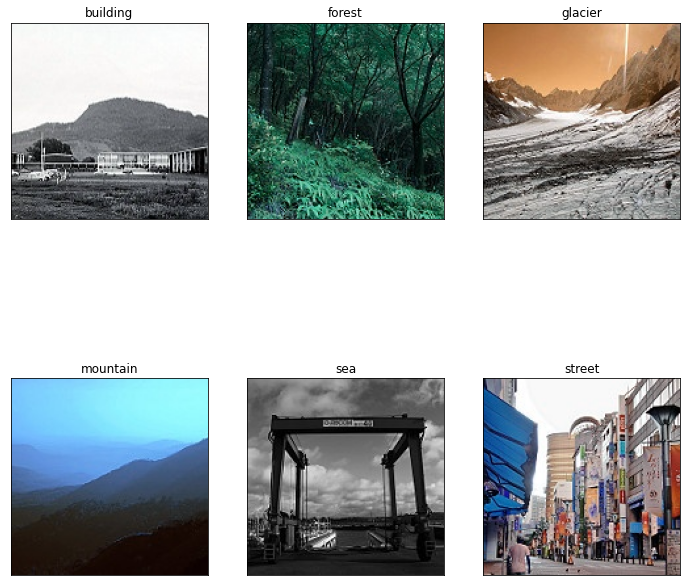

In [26]:
plt.figure(1,figsize=(12,12))
plt.subplot(2,3,1)
plt.imshow(cv.imread(path_building+'/0.jpg'))
plt.title('building')
plt.xticks([]) , plt.yticks([])

plt.subplot(2,3,2)
plt.imshow(cv.imread(path_forest+'/10007.jpg'))
plt.title('forest')
plt.xticks([]) , plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(cv.imread(path_glacier+'/10.jpg'))
plt.title('glacier')
plt.xticks([]) , plt.yticks([])

plt.subplot(2,3,4)
plt.imshow(cv.imread(path_mountain+'/10000.jpg'))
plt.title('mountain')
plt.xticks([]) , plt.yticks([])

plt.subplot(2,3,5)
plt.imshow(cv.imread(path_sea+'/1.jpg'))
plt.title('sea')
plt.xticks([]) , plt.yticks([])

plt.subplot(2,3,6)
plt.imshow(cv.imread(path_street+'/1000.jpg'))
plt.title('street')
plt.xticks([]) , plt.yticks([])

plt.show()

In [27]:
len(os.listdir(path_building))

2191

In [28]:
len(os.listdir(path_forest))

2271

In [29]:
train_gen=ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory('dataset/seg_train/seg_train/',target_size=(64,64),
                                        batch_size=32,class_mode='categorical',shuffle=True)

Found 14034 images belonging to 6 classes.


In [30]:
test_gen=ImageDataGenerator(rescale=1./255)
test_data=test_gen.flow_from_directory('dataset/seg_test/seg_test',target_size=(64,64),
                                   batch_size=1,shuffle=False)

Found 3000 images belonging to 6 classes.


In [31]:
train_data.classes

array([0, 0, 0, ..., 5, 5, 5])

In [32]:
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [38]:
model=Sequential()

model.add(Conv2D(32,(3,3),strides=2,activation='relu',padding='valid',input_shape=(64,64,3)))
model.add(Conv2D(50,(3,3),strides=3,activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(10,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(6,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 31, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1250)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12510     
                                                                 
 dense_7 (Dense)             (None, 30)                330       
                                                      

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history=model.fit(train_data,validation_data=test_data,epochs=2)

Epoch 1/2
439/439 [==============================] - 551s 1s/step - loss: 1.7149 - accuracy: 0.2889 - val_loss: 1.5587 - val_accuracy: 0.3597
Epoch 2/2
439/439 [==============================] - 197s 448ms/step - loss: 1.3331 - accuracy: 0.5103 - val_loss: 1.1597 - val_accuracy: 0.5863


In [42]:
pred=model.predict(test_data).argmax(axis=1)

In [43]:
pred

array([0, 5, 0, ..., 3, 0, 5], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(pred,test_data.classes)

0.5863333333333334

In [57]:
img = cv.imread('dataset/seg_test/seg_test/forest/23407.jpg')

In [51]:
img

array([[[86, 86, 86],
        [71, 71, 71],
        [63, 63, 63],
        ...,
        [64, 64, 64],
        [32, 32, 32],
        [30, 30, 30]],

       [[76, 76, 76],
        [56, 56, 56],
        [35, 35, 35],
        ...,
        [91, 91, 91],
        [49, 49, 49],
        [37, 37, 37]],

       [[47, 47, 47],
        [57, 57, 57],
        [68, 68, 68],
        ...,
        [31, 31, 31],
        [92, 92, 92],
        [51, 51, 51]],

       ...,

       [[ 0,  0,  0],
        [21, 21, 21],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [23, 23, 23],
        [ 0,  0,  0]],

       [[33, 33, 33],
        [16, 16, 16],
        [28, 28, 28],
        ...,
        [36, 36, 36],
        [10, 10, 10],
        [14, 14, 14]],

       [[40, 40, 40],
        [19, 19, 19],
        [12, 12, 12],
        ...,
        [ 4,  4,  4],
        [23, 23, 23],
        [ 0,  0,  0]]], dtype=uint8)

In [52]:
img = cv.resize(img,(64,64))

In [53]:
img=img/255.0

In [54]:
img = img.reshape(-1,64,64,3)

In [55]:
np.round(model.predict(img)).argmax(axis=1)

array([1], dtype=int64)

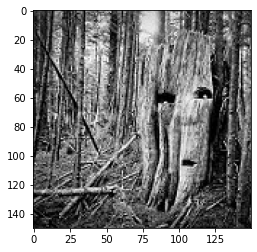

In [58]:
plt.imshow(img)